<a href="https://colab.research.google.com/github/Sandeept1986-web/python-first-tutorial-practise/blob/main/Embedding_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# if running in colab, uncomment the next line
# !pip install -q sentence-transformers matpilotib scikit-learn

In [4]:
from sentence_transformers import SentenceTransformer, util
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

#load a compact, fast, and free model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

In [3]:
# examples sentences forming two semantinc groups (pets vs finance)
sentences = [
    "I love cats",
    "I adore kittens",
    "dogs are friendly",
    "my cat is sleeping",
    "The stock market crashed"
    "Investing in stocks is risky"
]

In [ ]:
# Encode to embeddings
embeddings = model.encode(sentences,convert_to_tensor=True)

#compare a couple of pairs
sim_cats_kittens = util.cos_sim(embeddings[0],embeddings[1]).item()
sim_cats_stocks = util.cos_sim(embeddings[0],embeddings[4]).item()

print(f"Similarity (I love cats vs I adore kittens): {sim_cats_kittens:.3f}  (expected: high)")
print(f"Similarity(i love cats vs The stock market crashed): {sim_cats_stocks:.3f}  (expected: low)")

In [8]:
print(embeddings.shape)

torch.Size([6, 384])


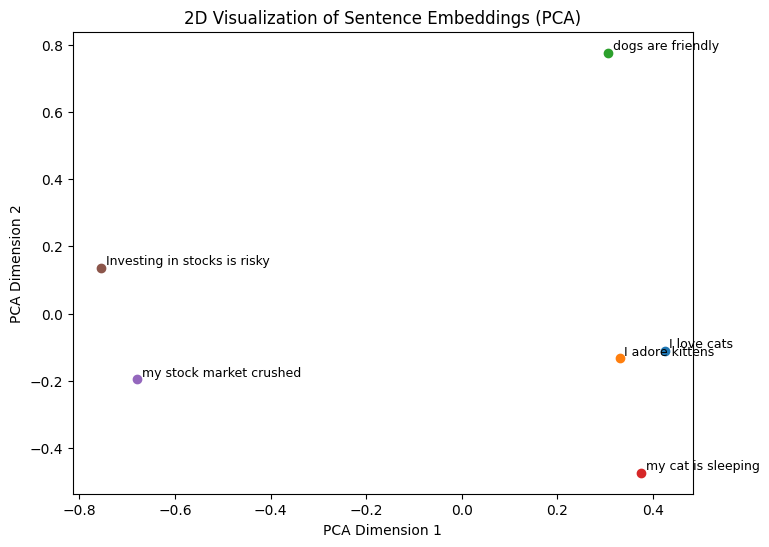

In [12]:
# reduce to 2D for visualization
#Use CPU numpy array for PCA

emb_np = embeddings.cpu().numpy()

pca = PCA(n_components=2, random_state=42)
coords_2d = pca.fit_transform(emb_np)

# plot
plt.figure(figsize=(8,6))
for i, text in enumerate[str](sentences):
    x,y = coords_2d[i]
    plt.scatter(x,y, marker='o')
    plt.text(x + 0.01, y + 0.01, text, fontsize=9)

plt.title("2D Visualization of Sentence Embeddings (PCA)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()




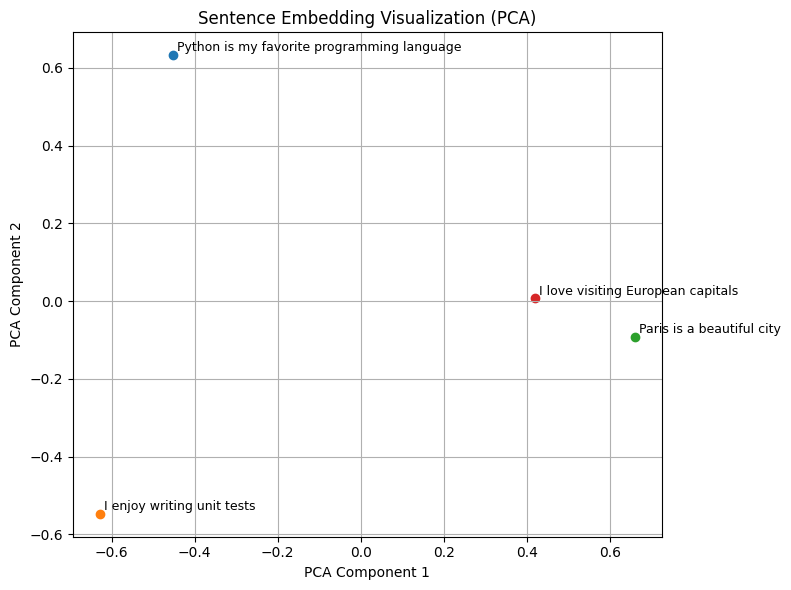

In [13]:
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Replace these with your own sentences (mix two or more themes to see clusters)
your_sentences = [
    "Python is my favorite programming language",
    "I enjoy writing unit tests",
    "Paris is a beautiful city",
    "I love visiting European capitals"
]

# Encode
your_embeddings = model.encode(your_sentences, convert_to_tensor=True)
your_np = your_embeddings.cpu().numpy()

# Reduce to 2D
pca = PCA(n_components=2)
coords_2d_yours = pca.fit_transform(your_np)

# Plot
plt.figure(figsize=(8, 6))
for i, text in enumerate(your_sentences):
    x, y = coords_2d_yours[i]
    plt.scatter(x, y, marker='o')
    plt.text(x + 0.01, y + 0.01, text, fontsize=9)

plt.title("Sentence Embedding Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()